In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data

In [2]:
data = pd.read_csv('cleaned_raw_house_data.csv')

In [3]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

In [4]:
#data= data[["sold_price","longitude","latitude","bedrooms","bathrooms","sqrt_ft","garage","price_per_sqft"]]
#data.to_csv("train_data.csv")

#### Feature engineering [Price Per sqft]

In [5]:
data["price_per_sqft"] = data.sold_price.div(data.sqrt_ft)

In [6]:
columns = ["sold_price","longitude","latitude","bedrooms","bathrooms","sqrt_ft","garage","price_per_sqft"]
data = data[columns]

In [7]:
data.garage.fillna(value=0, inplace=True)

In [8]:
data.describe()

,sold_price,longitude,latitude,bedrooms,bathrooms,sqrt_ft,garage,price_per_sqft
count,4990.00,4990.00,4990.00,4990.00,4990.00,4990.00,4990.00,4990.00
mean,775016.16,-110.91,32.31,3.92,3.80,3708.06,2.81,212.45
std,318745.47,0.12,0.18,0.97,1.06,1054.99,1.20,68.29
min,169000.00,-112.52,31.36,1.00,1.00,1100.00,0.00,56.65
25%,585000.00,-110.98,32.28,3.00,3.00,3050.25,2.00,175.39
50%,675000.00,-110.92,32.32,4.00,4.00,3511.50,3.00,202.11
75%,836750.00,-110.86,32.39,4.00,4.00,4124.50,3.00,233.64
max,5300000.00,-109.45,34.93,19.00,18.00,13000.00,30.00,1320.84


#### Remove outlier

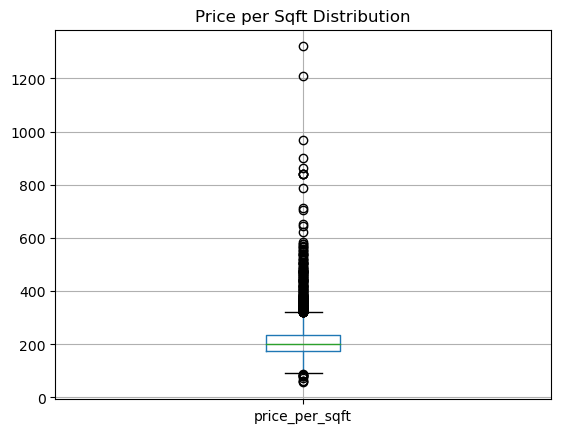

In [9]:
# Create a figure for the first boxplot
plt.figure()
data.boxplot("price_per_sqft")
plt.title("Price per Sqft Distribution")
plt.show()

In [10]:
#data[data.price_per_sqft > 1000].index

In [11]:
data[data.price_per_sqft > 1000]

,sold_price,longitude,latitude,bedrooms,bathrooms,sqrt_ft,garage,price_per_sqft
2,4200000.00,-111.04,31.59,2,3.00,3179.80,0.00,1320.84
279,1450000.00,-110.65,31.43,1,1.00,1200.00,2.00,1208.33


In [12]:
data.drop(data[data.price_per_sqft > 1000].index, inplace=True)

In [13]:
data

,sold_price,longitude,latitude,bedrooms,bathrooms,sqrt_ft,garage,price_per_sqft
0,5300000.00,-110.38,31.36,13,10.00,10500.00,0.00,504.76
1,4200000.00,-111.05,31.59,2,2.00,7300.00,0.00,575.34
3,4500000.00,-111.04,31.65,7,5.00,9019.00,4.00,498.95
4,3411450.00,-110.81,32.29,4,6.00,6396.00,3.00,533.37
5,3250000.00,-110.91,32.34,3,4.00,6842.00,3.00,475.01
...,...,...,...,...,...,...,...,...
4985,495000.00,-110.66,31.91,5,3.00,3601.00,3.00,137.46
4986,550000.00,-110.86,32.32,4,3.00,2318.00,3.00,237.27
4987,475000.00,-110.76,32.96,3,2.00,1772.00,0.00,268.06
4988,550000.00,-111.06,32.30,4,4.00,3724.00,3.00,147.69


#### Scaling of Data [z-score]

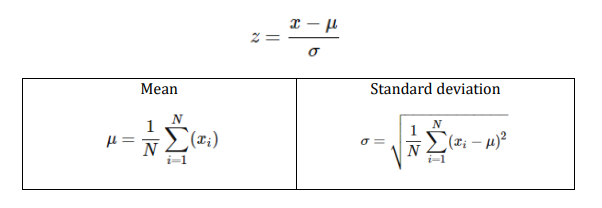

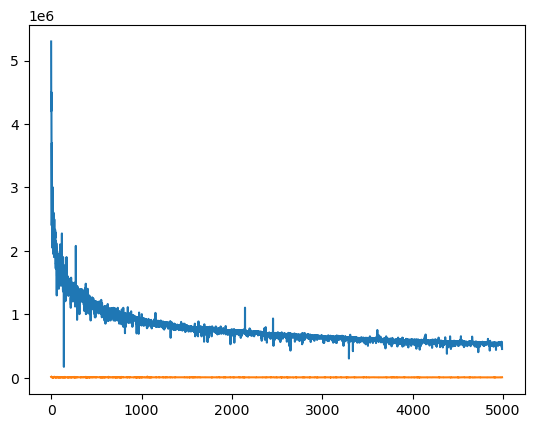

In [14]:
plt.figure()
data.sold_price.plot()
data.sqrt_ft.plot()
plt.show()

In [15]:
mean_price = data.sold_price.mean()
mean_sqft = data.sqrt_ft.mean()

In [16]:
mean_price

774194.19643745

In [17]:
mean_sqft

3708.6733861267035

In [18]:
std_price = data.sold_price.std()
std_sqft = data.sqrt_ft.std()

In [19]:
std_price

314952.64148004656

In [20]:
std_sqft

1054.5803055387605

In [21]:
data["sold_price_z"] = (data.sold_price - mean_price)/std_price
data["sqft_z"] = (data.sqrt_ft - mean_sqft)/std_sqft

In [22]:
data.head()

,sold_price,longitude,latitude,bedrooms,bathrooms,sqrt_ft,garage,price_per_sqft,sold_price_z,sqft_z
0,5300000.00,-110.38,31.36,13,10.00,10500.00,0.00,504.76,14.37,6.44
1,4200000.00,-111.05,31.59,2,2.00,7300.00,0.00,575.34,10.88,3.41
3,4500000.00,-111.04,31.65,7,5.00,9019.00,4.00,498.95,11.83,5.04
4,3411450.00,-110.81,32.29,4,6.00,6396.00,3.00,533.37,8.37,2.55
5,3250000.00,-110.91,32.34,3,4.00,6842.00,3.00,475.01,7.86,2.97


In [23]:
data.tail()

,sold_price,longitude,latitude,bedrooms,bathrooms,sqrt_ft,garage,price_per_sqft,sold_price_z,sqft_z
4985,495000.00,-110.66,31.91,5,3.00,3601.00,3.00,137.46,-0.89,-0.10
4986,550000.00,-110.86,32.32,4,3.00,2318.00,3.00,237.27,-0.71,-1.32
4987,475000.00,-110.76,32.96,3,2.00,1772.00,0.00,268.06,-0.95,-1.84
4988,550000.00,-111.06,32.30,4,4.00,3724.00,3.00,147.69,-0.71,0.01
4989,450000.00,-110.91,31.39,4,4.00,4317.00,0.00,104.24,-1.03,0.58


In [24]:
data.describe()

,sold_price,longitude,latitude,bedrooms,bathrooms,sqrt_ft,garage,price_per_sqft,sold_price_z,sqft_z
count,4988.00,4988.00,4988.00,4988.00,4988.00,4988.00,4988.00,4988.00,4988.00,4988.00
mean,774194.20,-110.91,32.31,3.92,3.81,3708.67,2.81,212.03,-0.00,0.00
std,314952.64,0.12,0.18,0.96,1.06,1054.58,1.20,64.96,1.00,1.00
min,169000.00,-112.52,31.36,1.00,1.00,1100.00,0.00,56.65,-1.92,-2.47
25%,585000.00,-110.98,32.28,3.00,3.00,3050.75,2.00,175.39,-0.60,-0.62
50%,675000.00,-110.92,32.32,4.00,4.00,3512.00,3.00,202.10,-0.31,-0.19
75%,835250.00,-110.86,32.39,4.00,4.00,4125.00,3.00,233.64,0.19,0.39
max,5300000.00,-109.45,34.93,19.00,18.00,13000.00,30.00,969.31,14.37,8.81


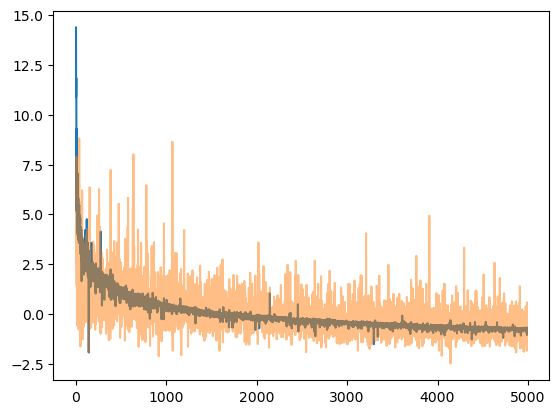

In [25]:
plt.figure()
data.sold_price_z.plot()
data.sqft_z.plot(alpha=0.5)
plt.show()

#### Feature engineering [Categorize price per sqft]

In [26]:
data['cat_by_price_per_sqft'] = data.price_per_sqft//100

In [27]:
data.price_per_sqft.describe()

count   4988.00
mean     212.03
std       64.96
min       56.65
25%      175.39
50%      202.10
75%      233.64
max      969.31
Name: price_per_sqft, dtype: float64

In [28]:
data[["sold_price_z", "sqft_z","price_per_sqft","cat_by_price_per_sqft"]].corr()

,sold_price_z,sqft_z,price_per_sqft,cat_by_price_per_sqft
sold_price_z,1.00,0.57,0.65,0.59
sqft_z,0.57,1.00,-0.18,-0.16
price_per_sqft,0.65,-0.18,1.00,0.91
cat_by_price_per_sqft,0.59,-0.16,0.91,1.00


<function matplotlib.pyplot.show(close=None, block=None)>

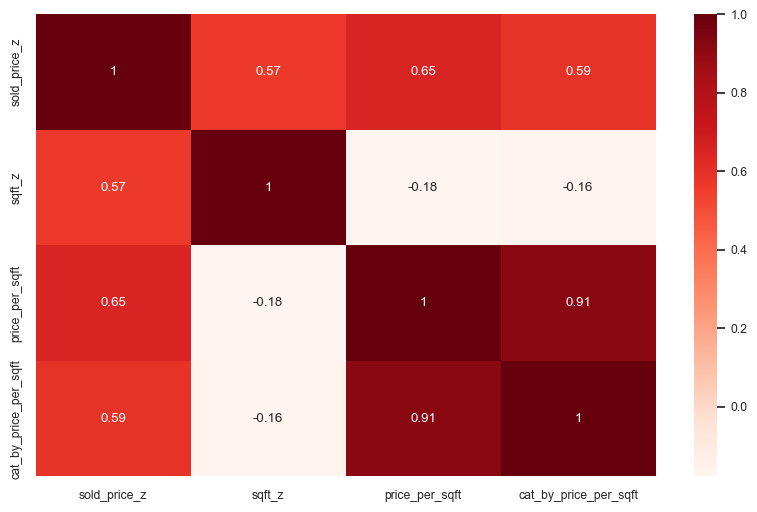

In [29]:
plt.figure(figsize=(10,6))
sns.set(font_scale=.8)
sns.heatmap(data[["sold_price_z", "sqft_z","price_per_sqft","cat_by_price_per_sqft"]].corr(), annot=True, cmap="Reds")
plt.show

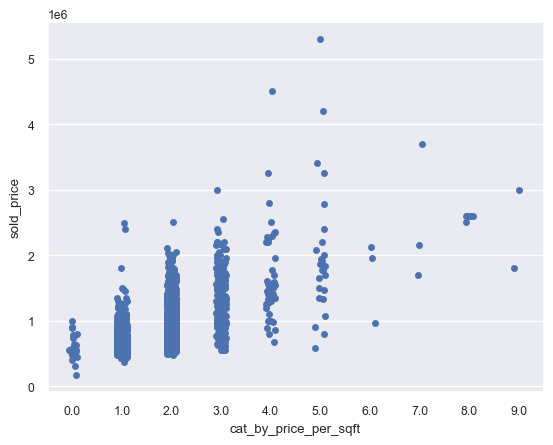

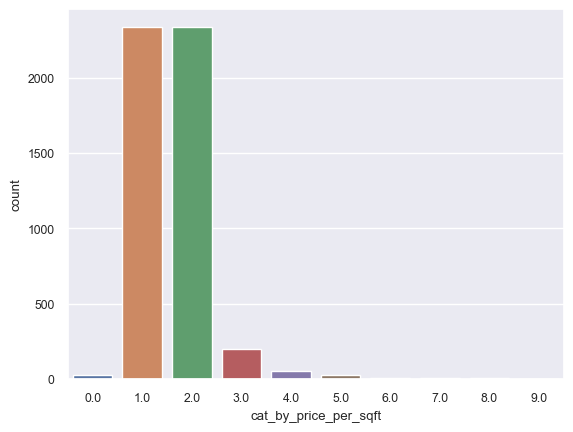

In [30]:
plt.figure(1)
sns.stripplot(data= data, x="cat_by_price_per_sqft", y="sold_price", jitter=True, dodge=True)
plt.figure(2)
sns.countplot(data= data, x="cat_by_price_per_sqft")
plt.show()

In [31]:
data.cat_by_price_per_sqft.value_counts(normalize=True)

cat_by_price_per_sqft
2.00   0.47
1.00   0.47
3.00   0.04
4.00   0.01
5.00   0.01
0.00   0.01
8.00   0.00
7.00   0.00
6.00   0.00
9.00   0.00
Name: proportion, dtype: float64

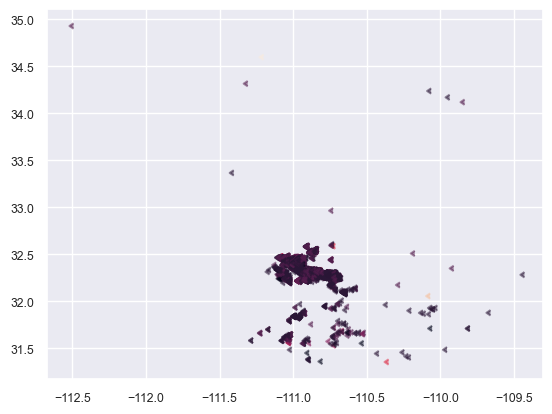

In [32]:
plt.figure()
plt.scatter(y=data.latitude, x=data.longitude, c=data.cat_by_price_per_sqft, alpha=0.5, s=15, marker =4)
plt.show()

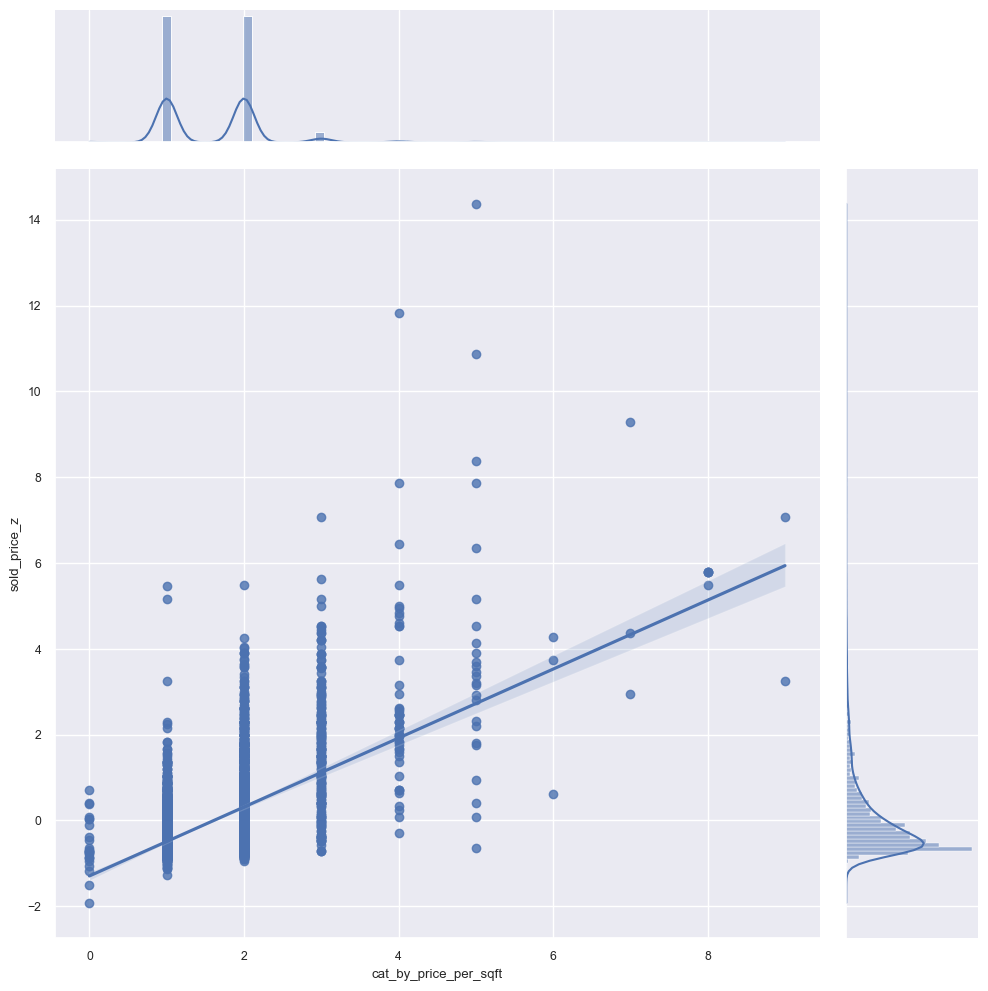

In [33]:

sns.jointplot(data=data, x="cat_by_price_per_sqft", y= "sold_price_z", kind="reg", height=10)
plt.show()

In [34]:
data[["sold_price_z", "sqft_z","price_per_sqft","cat_by_price_per_sqft"]].corr()

,sold_price_z,sqft_z,price_per_sqft,cat_by_price_per_sqft
sold_price_z,1.00,0.57,0.65,0.59
sqft_z,0.57,1.00,-0.18,-0.16
price_per_sqft,0.65,-0.18,1.00,0.91
cat_by_price_per_sqft,0.59,-0.16,0.91,1.00


C:\Users\Admin\AppData\Local\Temp\ipykernel_30188\2059617273.py:2: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(data[data.cat_by_price_per_sqft==1], x="sqft_z", y= "sold_price_z", kind="reg", ax=axes[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_30188\2059617273.py:4: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(data[data.cat_by_price_per_sqft==1], x="sqrt_ft", y= "sold_price", kind="reg", ax=axes[1])


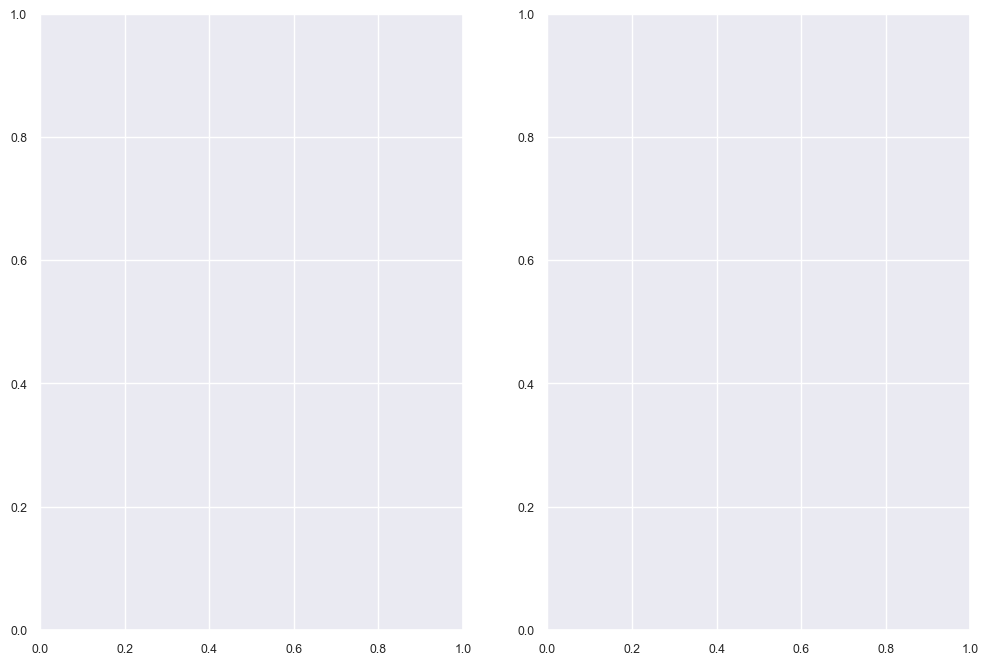

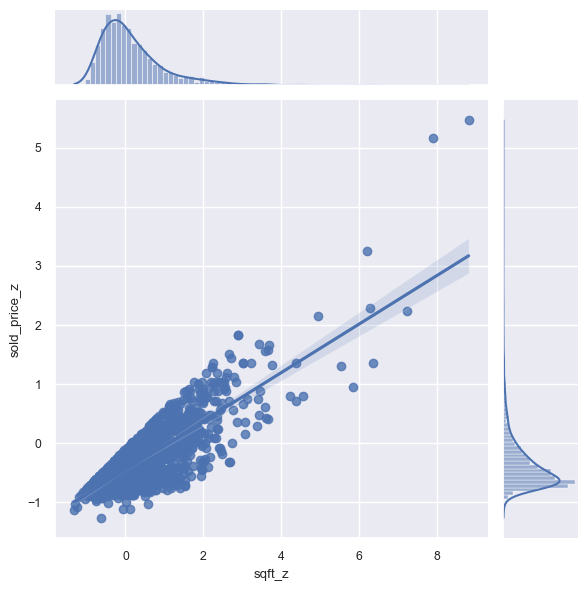

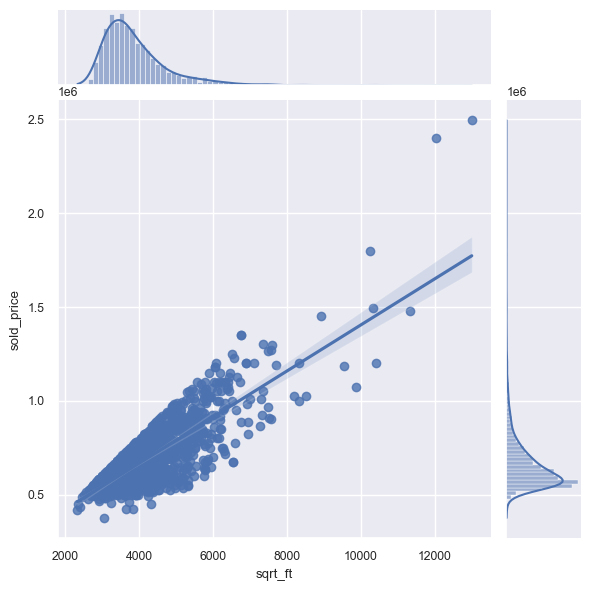

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.jointplot(data[data.cat_by_price_per_sqft==1], x="sqft_z", y= "sold_price_z", kind="reg", ax=axes[0])

sns.jointplot(data[data.cat_by_price_per_sqft==1], x="sqrt_ft", y= "sold_price", kind="reg", ax=axes[1])


# Show the plot
plt.show()

#### Split data into Training set and Test set

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
test_size = 0.2

In [38]:
data.to_csv('mv_data.csv')

In [39]:
X = data
y = data['cat_by_price_per_sqft']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,stratify=y, random_state=42)

In [41]:
X_train.to_csv('mv_train.csv')
X_test.to_csv('mv_test.csv')


In [42]:
X_train

,sold_price,longitude,latitude,bedrooms,bathrooms,sqrt_ft,garage,price_per_sqft,sold_price_z,sqft_z,cat_by_price_per_sqft
3606,600000.00,-110.94,32.32,4,3.00,3101.00,2.00,193.49,-0.55,-0.58,1.00
2157,725000.00,-110.79,32.28,4,4.00,3798.00,2.00,190.89,-0.16,0.08,1.00
1090,862500.00,-110.96,32.47,5,6.00,4709.00,4.00,183.16,0.28,0.95,1.00
886,900000.00,-110.86,32.55,4,4.00,3927.00,3.00,229.18,0.40,0.21,2.00
66,1995000.00,-110.91,32.34,4,6.00,6236.00,3.00,319.92,3.88,2.40,3.00
...,...,...,...,...,...,...,...,...,...,...,...
2610,690000.00,-110.96,32.31,3,3.00,3879.00,2.00,177.88,-0.27,0.16,1.00
1626,799000.00,-110.75,32.45,4,3.00,2220.00,0.00,359.91,0.08,-1.41,3.00
159,1525000.00,-111.05,32.48,5,5.00,4551.00,3.00,335.09,2.38,0.80,3.00
2752,644500.00,-110.73,32.26,4,3.00,3533.00,3.00,182.42,-0.41,-0.17,1.00


##### Setting up training set

In [43]:
y_train

3606   1.00
2157   1.00
1090   1.00
886    2.00
66     3.00
       ... 
2610   1.00
1626   3.00
159    3.00
2752   1.00
1732   1.00
Name: cat_by_price_per_sqft, Length: 3990, dtype: float64

In [44]:
y_train.value_counts(normalize = True)

cat_by_price_per_sqft
2.00   0.47
1.00   0.47
3.00   0.04
4.00   0.01
0.00   0.01
5.00   0.01
8.00   0.00
6.00   0.00
7.00   0.00
9.00   0.00
Name: proportion, dtype: float64

In [45]:
y = y_train.to_numpy().astype(int)

In [46]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [47]:
y.shape

(3990,)

In [48]:
X = X_train.to_numpy()
X

array([[ 6.00000000e+05, -1.10942222e+02,  3.23166930e+01, ...,
        -5.53080602e-01, -5.76222961e-01,  1.00000000e+00],
       [ 7.25000000e+05, -1.10791487e+02,  3.22816670e+01, ...,
        -1.56195535e-01,  8.47034725e-02,  1.00000000e+00],
       [ 8.62500000e+05, -1.10962516e+02,  3.24726300e+01, ...,
         2.80378038e-01,  9.48554234e-01,  1.00000000e+00],
       ...,
       [ 1.52500000e+06, -1.11053614e+02,  3.24796070e+01, ...,
         2.38386889e+00,  7.98731599e-01,  3.00000000e+00],
       [ 6.44500000e+05, -1.10729025e+02,  3.22632740e+01, ...,
        -4.11789518e-01, -1.66581326e-01,  1.00000000e+00],
       [ 7.80000000e+05, -1.10925135e+02,  3.22254870e+01, ...,
         1.84338939e-02,  6.86838745e-01,  1.00000000e+00]])

In [49]:
X_log_lat = X[:,[1,2,7]]
X_log_lat

array([[-110.942222  ,   32.316693  ,  193.48597227],
       [-110.791487  ,   32.281667  ,  190.88994207],
       [-110.962516  ,   32.47263   ,  183.15990656],
       ...,
       [-111.053614  ,   32.479607  ,  335.09118875],
       [-110.729025  ,   32.263274  ,  182.42287008],
       [-110.925135  ,   32.225487  ,  175.95307918]])

In [50]:
X_log_lat.shape

(3990, 3)

##### Setting up test set

In [51]:
y_test

1133   2.00
2846   2.00
466    2.00
1037   2.00
146    5.00
       ... 
3748   1.00
3449   1.00
4106   2.00
940    2.00
1189   2.00
Name: cat_by_price_per_sqft, Length: 998, dtype: float64

In [52]:
y_test.value_counts(normalize = True)

cat_by_price_per_sqft
2.00   0.47
1.00   0.47
3.00   0.04
4.00   0.01
5.00   0.01
0.00   0.01
6.00   0.00
8.00   0.00
7.00   0.00
Name: proportion, dtype: float64

In [53]:
yt=y_test.to_numpy().astype(int)

In [54]:
set(yt)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [55]:
yt.shape

(998,)

In [56]:
Xt = X_test.to_numpy()
Xt

array([[ 8.85000000e+05, -1.10914692e+02,  3.22891810e+01, ...,
         3.51817350e-01,  5.91008703e-02,  2.00000000e+00],
       [ 6.60000000e+05, -1.10849338e+02,  3.22805410e+01, ...,
        -3.62575770e-01, -1.14801441e+00,  2.00000000e+00],
       [ 1.24900000e+06, -1.10912026e+02,  3.22908500e+01, ...,
         1.50754666e+00,  1.66258236e+00,  2.00000000e+00],
       ...,
       [ 5.55000000e+05, -1.10852115e+02,  3.23207740e+01, ...,
        -6.95959226e-01, -1.40119570e+00,  2.00000000e+00],
       [ 8.95000000e+05, -1.10907494e+02,  3.22857550e+01, ...,
         3.83568155e-01,  4.87707395e-01,  2.00000000e+00],
       [ 8.75000000e+05, -1.10821343e+02,  3.22827730e+01, ...,
         3.20066544e-01,  8.94446951e-02,  2.00000000e+00]])

In [57]:
Xt_log_lat = Xt[:,[1,2,7]]
Xt_log_lat

array([[-110.914692  ,   32.289181  ,  234.68575975],
       [-110.849338  ,   32.280541  ,  264.2113691 ],
       [-110.912026  ,   32.29085   ,  228.67081655],
       ...,
       [-110.852115  ,   32.320774  ,  248.76736889],
       [-110.907494  ,   32.285755  ,  211.93464362],
       [-110.821343  ,   32.282773  ,  230.08151459]])

In [58]:
Xt_log_lat.shape

(998, 3)

#### KNN Classifier

In [59]:
class KNNClassifier():
  def fit(self, X,y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K] #This function returns the sorted index and not the items itself. and it returns only the k items

      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))

      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()

    return y_hat

In [60]:
knn_location = KNNClassifier()
knn_location.fit(X_log_lat,y)

In [61]:
y_hat = knn_location.predict(X_log_lat,10)

In [62]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [63]:
accuracy(y,y_hat)

1.0

In [64]:
#X_test = [[32.221680, -110.781160]]

In [65]:
yt_hat = knn_location.predict(Xt_log_lat, 20)

In [66]:
accuracy(yt,yt_hat)

0.998997995991984

##### Remove data from test where price_per_sqft is move than 700 
##### The following code doesnt really matter. I was testing the KNN classifer with category [0-6]

In [67]:
y_test_6 = y_test.drop(y_test[y_test >= 6].index)
y_test_6

1133   2.00
2846   2.00
466    2.00
1037   2.00
146    5.00
       ... 
3748   1.00
3449   1.00
4106   2.00
940    2.00
1189   2.00
Name: cat_by_price_per_sqft, Length: 995, dtype: float64

In [68]:
y_test_6.value_counts()

cat_by_price_per_sqft
2.00    468
1.00    467
3.00     40
4.00     10
5.00      5
0.00      5
Name: count, dtype: int64

In [69]:
yt6 = y_test_6.to_numpy().astype(int)

In [70]:
yt6.shape

(995,)

In [71]:
X_test_6 = X_test.drop(y_test[y_test >= 6].index)
X_test_6

,sold_price,longitude,latitude,bedrooms,bathrooms,sqrt_ft,garage,price_per_sqft,sold_price_z,sqft_z,cat_by_price_per_sqft
1133,885000.00,-110.91,32.29,3,3.00,3771.00,3.00,234.69,0.35,0.06,2.00
2846,660000.00,-110.85,32.28,2,3.00,2498.00,2.00,264.21,-0.36,-1.15,2.00
466,1249000.00,-110.91,32.29,4,6.00,5462.00,3.00,228.67,1.51,1.66,2.00
1037,860000.00,-110.92,32.34,4,5.00,4107.00,3.00,209.40,0.27,0.38,2.00
146,1769386.00,-111.10,32.47,3,4.00,3276.00,3.00,540.11,3.16,-0.41,5.00
...,...,...,...,...,...,...,...,...,...,...,...
3748,590000.00,-110.73,32.24,4,4.00,4127.00,3.50,142.96,-0.58,0.40,1.00
3449,600000.00,-110.90,32.29,5,4.00,4430.00,3.00,135.44,-0.55,0.68,1.00
4106,555000.00,-110.85,32.32,3,3.00,2231.00,2.00,248.77,-0.70,-1.40,2.00
940,895000.00,-110.91,32.29,4,5.00,4223.00,0.00,211.93,0.38,0.49,2.00


In [72]:
Xt6 = X_test_6.to_numpy()

In [73]:
Xt6_log_lat = Xt6[:,[1,2,7]]
Xt6_log_lat

array([[-110.914692  ,   32.289181  ,  234.68575975],
       [-110.849338  ,   32.280541  ,  264.2113691 ],
       [-110.912026  ,   32.29085   ,  228.67081655],
       ...,
       [-110.852115  ,   32.320774  ,  248.76736889],
       [-110.907494  ,   32.285755  ,  211.93464362],
       [-110.821343  ,   32.282773  ,  230.08151459]])

In [74]:
Xt6_log_lat.shape

(995, 3)

In [75]:
yt6_hat = knn_location.predict(Xt6_log_lat, 20)

In [76]:
accuracy(yt6,yt6_hat)

0.9989949748743718

#### OLS Regressor with Gradient Descent

In [77]:
def OLS(Y, Y_hat, N):
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))

In [78]:
class MVLinearRegression():

  def fit(self, X, y, eta = 1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N, D = X.shape
    Y=y

    #Begin Optimization
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)

    #Stostachistic Gradient Descent
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch]= OLS(Y, Y_hat, N)
      #Weight Update Rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title(f"Training Curve for label")

  def predict(self, X):
    return X@self.W


##### Train set for all labels

In [79]:
label_columns = ["sold_price","cat_by_price_per_sqft","bedrooms","bathrooms","price_per_sqft","sqrt_ft"]
Xdf = X_train[label_columns]

In [80]:
Xdf

,sold_price,cat_by_price_per_sqft,bedrooms,bathrooms,price_per_sqft,sqrt_ft
3606,600000.00,1.00,4,3.00,193.49,3101.00
2157,725000.00,1.00,4,4.00,190.89,3798.00
1090,862500.00,1.00,5,6.00,183.16,4709.00
886,900000.00,2.00,4,4.00,229.18,3927.00
66,1995000.00,3.00,4,6.00,319.92,6236.00
...,...,...,...,...,...,...
2610,690000.00,1.00,3,3.00,177.88,3879.00
1626,799000.00,3.00,4,3.00,359.91,2220.00
159,1525000.00,3.00,5,5.00,335.09,4551.00
2752,644500.00,1.00,4,3.00,182.42,3533.00


In [81]:
Xdf.cat_by_price_per_sqft.value_counts()

cat_by_price_per_sqft
2.00    1872
1.00    1870
3.00     158
4.00      40
0.00      20
5.00      20
8.00       4
6.00       2
7.00       2
9.00       2
Name: count, dtype: int64

In [82]:
X = Xdf.to_numpy()

In [83]:
X.shape

(3990, 6)

In [84]:
X

array([[6.00000000e+05, 1.00000000e+00, 4.00000000e+00, 3.00000000e+00,
        1.93485972e+02, 3.10100000e+03],
       [7.25000000e+05, 1.00000000e+00, 4.00000000e+00, 4.00000000e+00,
        1.90889942e+02, 3.79800000e+03],
       [8.62500000e+05, 1.00000000e+00, 5.00000000e+00, 6.00000000e+00,
        1.83159907e+02, 4.70900000e+03],
       ...,
       [1.52500000e+06, 3.00000000e+00, 5.00000000e+00, 5.00000000e+00,
        3.35091189e+02, 4.55100000e+03],
       [6.44500000e+05, 1.00000000e+00, 4.00000000e+00, 3.00000000e+00,
        1.82422870e+02, 3.53300000e+03],
       [7.80000000e+05, 1.00000000e+00, 5.00000000e+00, 4.00000000e+00,
        1.75953079e+02, 4.43300000e+03]])

In [85]:
y = X[:,0]
k= X[:,1]
X=X[:,2:]

In [86]:
k.shape

(3990,)

In [87]:
set(k.astype(int))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [88]:
y.shape

(3990,)

In [89]:
X0_sub = X[k==0]

In [90]:
X0_sub.shape

(20, 4)

In [91]:
X0_sub

array([[3.00000000e+00, 3.00000000e+00, 9.85323549e+01, 7.49500000e+03],
       [1.90000000e+01, 1.80000000e+01, 7.36383084e+01, 1.21540000e+04],
       [3.00000000e+00, 4.00000000e+00, 9.77278280e+01, 4.09300000e+03],
       [5.00000000e+00, 7.00000000e+00, 9.45009023e+01, 1.05290000e+04],
       [3.00000000e+00, 4.00000000e+00, 9.49311967e+01, 5.74100000e+03],
       [8.00000000e+00, 7.00000000e+00, 5.66524568e+01, 8.91400000e+03],
       [3.00000000e+00, 3.50000000e+00, 9.01442308e+01, 3.32800000e+03],
       [1.00000000e+00, 2.00000000e+00, 9.44206009e+01, 5.82500000e+03],
       [2.00000000e+00, 5.00000000e+00, 6.12933323e+01, 1.28080000e+04],
       [1.10000000e+01, 1.10000000e+01, 8.62068966e+01, 5.80000000e+03],
       [5.00000000e+00, 5.00000000e+00, 8.10134040e+01, 6.78900000e+03],
       [4.00000000e+00, 3.00000000e+00, 9.94117647e+01, 1.70000000e+03],
       [3.00000000e+00, 4.00000000e+00, 9.98257012e+01, 6.31100000e+03],
       [5.00000000e+00, 5.00000000e+00, 8.29002645e

In [92]:
y0_sub=y[k==0]

In [93]:
y0_sub.shape

(20,)

In [94]:
X1_sub = X[k==1]
X2_sub = X[k==2]
X3_sub = X[k==3]
X4_sub = X[k==4]
X5_sub = X[k==5]
X6_sub = X[k==6]
X7_sub = X[k==7]
X8_sub = X[k==8]
X9_sub = X[k==9]

In [95]:
y1_sub = y[k==1]
y2_sub = y[k==2]
y3_sub = y[k==3]
y4_sub = y[k==4]
y5_sub = y[k==5]
y6_sub = y[k==6]
y7_sub = y[k==7]
y8_sub = y[k==8]
y9_sub = y[k==9]

##### MV fit for all outcomes [0-9]

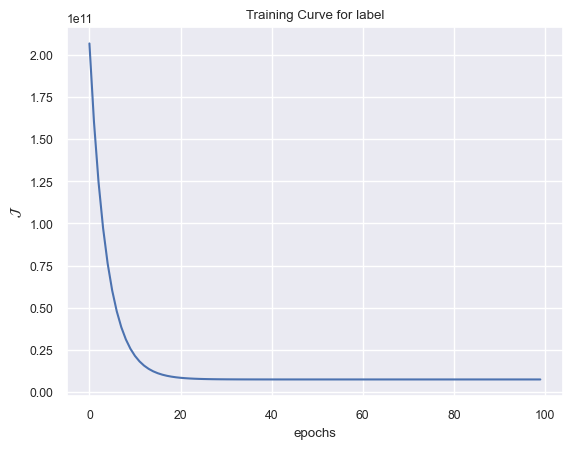

In [96]:
mv_0 = MVLinearRegression()
mv_0.fit(X0_sub,y0_sub,eta=2e-9,epochs=1e2,show_curve=True) 

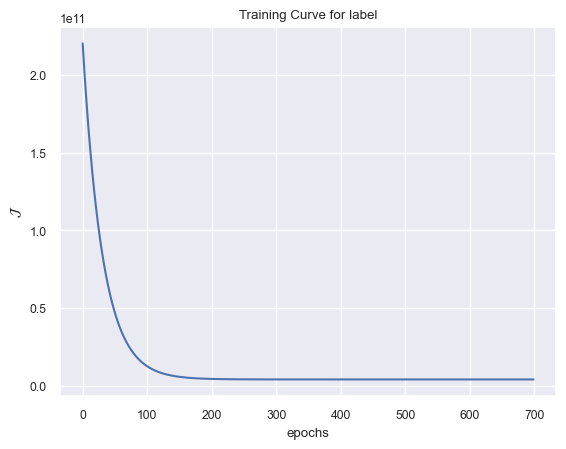

In [97]:
mv_1 = MVLinearRegression()
mv_1.fit(X1_sub,y1_sub,eta=1e-9,epochs=7e2,show_curve=True) 

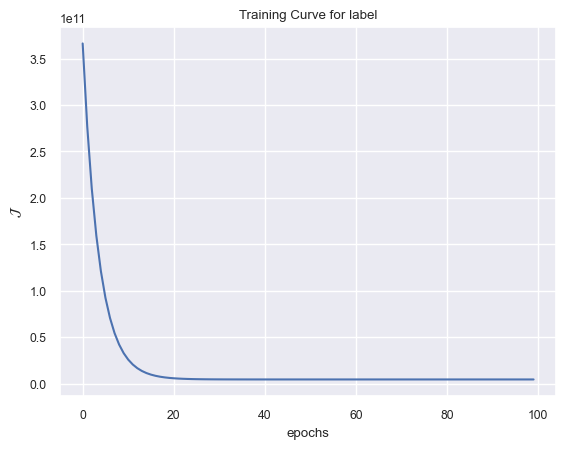

In [98]:
mv_2 = MVLinearRegression()
mv_2.fit(X2_sub,y2_sub,eta=1e-8,epochs=1e2,show_curve=True) 

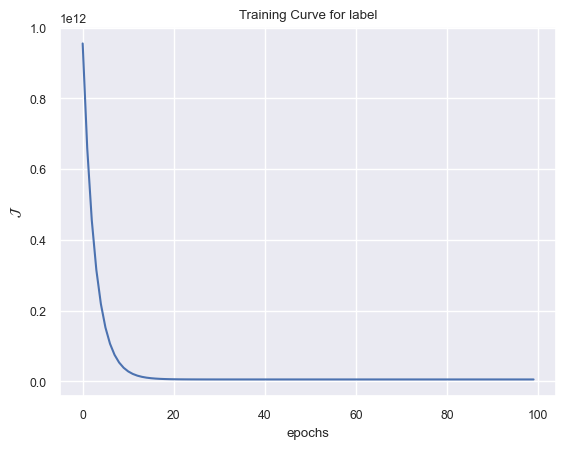

In [99]:
mv_3 = MVLinearRegression()
mv_3.fit(X3_sub,y3_sub,eta=1e-8,epochs=1e2,show_curve=True) 

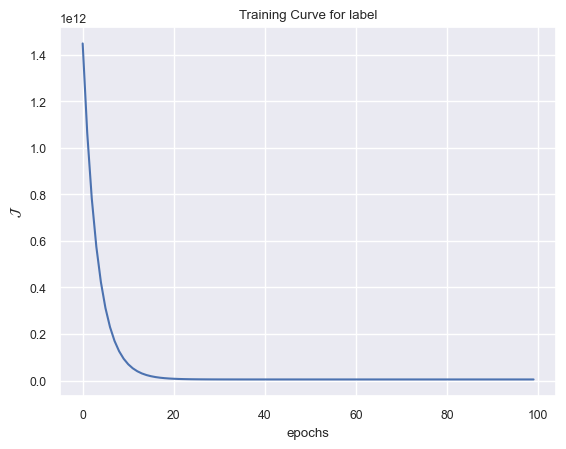

In [100]:
mv_4 = MVLinearRegression()
mv_4.fit(X4_sub,y4_sub,eta=1e-8,epochs=1e2,show_curve=True) 

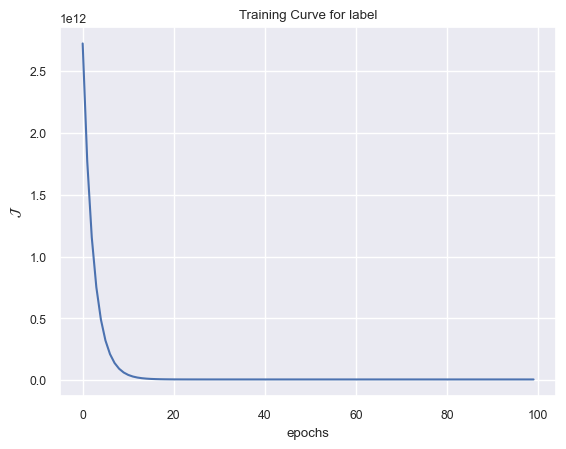

In [101]:
mv_5 = MVLinearRegression()
mv_5.fit(X5_sub,y5_sub,eta=1e-8,epochs=1e2,show_curve=True) 

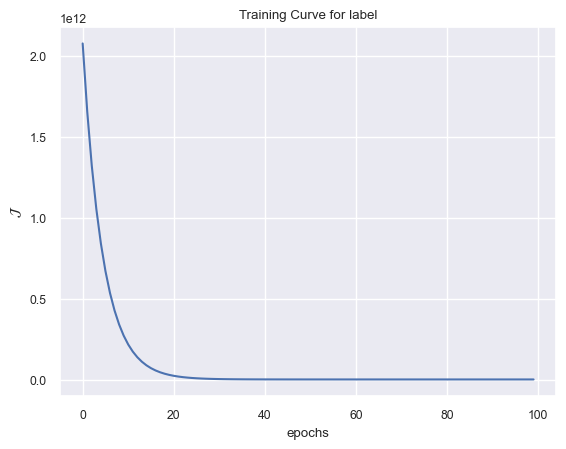

In [102]:
mv_6 = MVLinearRegression()
mv_6.fit(X6_sub,y6_sub,eta=1e-8,epochs=1e2,show_curve=True) 

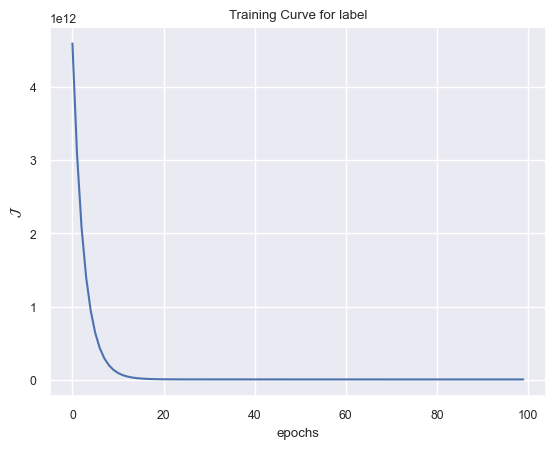

In [103]:
mv_7 = MVLinearRegression()
mv_7.fit(X7_sub,y7_sub,eta=1e-8,epochs=1e2,show_curve=True) 

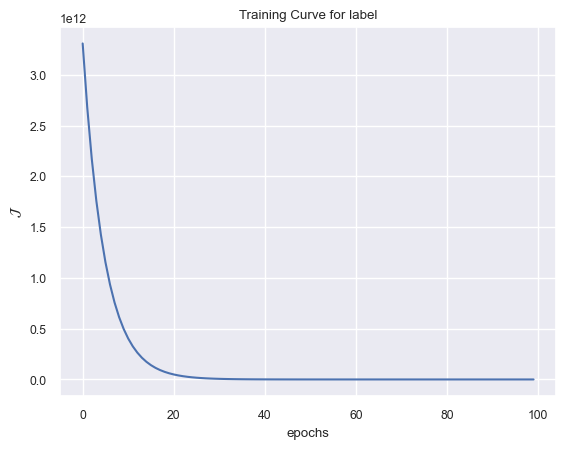

In [104]:
mv_8 = MVLinearRegression()
mv_8.fit(X8_sub,y8_sub,eta=1e-8,epochs=1e2,show_curve=True) 

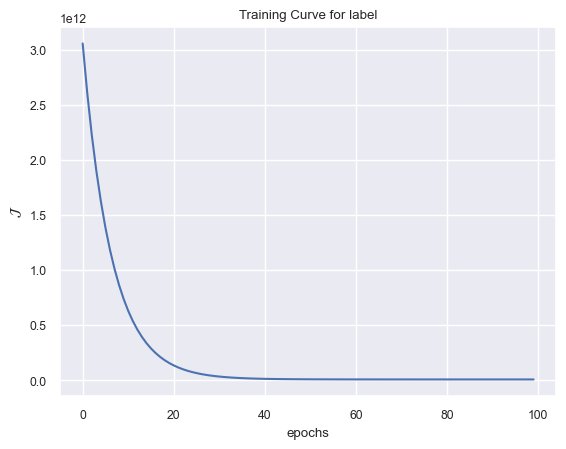

In [105]:
mv_9 = MVLinearRegression()
mv_9.fit(X9_sub,y9_sub,eta=1e-8,epochs=1e2,show_curve=True) 

##### Test all Outcome [0-9]

In [106]:
label_columns = ["sold_price","cat_by_price_per_sqft","bedrooms","bathrooms","price_per_sqft","sqrt_ft"]
Xtest_df = X_test[label_columns]

In [107]:
Xtest_df

,sold_price,cat_by_price_per_sqft,bedrooms,bathrooms,price_per_sqft,sqrt_ft
1133,885000.00,2.00,3,3.00,234.69,3771.00
2846,660000.00,2.00,2,3.00,264.21,2498.00
466,1249000.00,2.00,4,6.00,228.67,5462.00
1037,860000.00,2.00,4,5.00,209.40,4107.00
146,1769386.00,5.00,3,4.00,540.11,3276.00
...,...,...,...,...,...,...
3748,590000.00,1.00,4,4.00,142.96,4127.00
3449,600000.00,1.00,5,4.00,135.44,4430.00
4106,555000.00,2.00,3,3.00,248.77,2231.00
940,895000.00,2.00,4,5.00,211.93,4223.00


In [108]:
Xt = Xtest_df.to_numpy()

In [109]:
Xt

array([[8.85000000e+05, 2.00000000e+00, 3.00000000e+00, 3.00000000e+00,
        2.34685760e+02, 3.77100000e+03],
       [6.60000000e+05, 2.00000000e+00, 2.00000000e+00, 3.00000000e+00,
        2.64211369e+02, 2.49800000e+03],
       [1.24900000e+06, 2.00000000e+00, 4.00000000e+00, 6.00000000e+00,
        2.28670817e+02, 5.46200000e+03],
       ...,
       [5.55000000e+05, 2.00000000e+00, 3.00000000e+00, 3.00000000e+00,
        2.48767369e+02, 2.23100000e+03],
       [8.95000000e+05, 2.00000000e+00, 4.00000000e+00, 5.00000000e+00,
        2.11934644e+02, 4.22300000e+03],
       [8.75000000e+05, 2.00000000e+00, 3.00000000e+00, 4.00000000e+00,
        2.30081515e+02, 3.80300000e+03]])

In [110]:
Xt.shape

(998, 6)

In [111]:
yt = Xt[:,0]
kt= Xt[:,1]
Xt=Xt[:,2:]

In [112]:
kt.shape

(998,)

In [113]:
set(kt.astype(int))

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [114]:
yt.shape

(998,)

In [115]:
Xt0_sub = Xt[kt==0]

In [116]:
Xt0_sub.shape

(5, 4)

In [117]:
Xt0_sub

array([[4.00000000e+00, 5.00000000e+00, 9.81113564e+01, 8.15400000e+03],
       [6.00000000e+00, 4.00000000e+00, 9.65623793e+01, 5.17800000e+03],
       [5.00000000e+00, 7.00000000e+00, 9.13838120e+01, 5.74500000e+03],
       [3.00000000e+00, 4.00000000e+00, 9.55157852e+01, 4.97300000e+03],
       [6.00000000e+00, 5.00000000e+00, 8.30188679e+01, 5.30000000e+03]])

In [118]:
yt0_sub=yt[kt==0]

In [119]:
yt0_sub.shape

(5,)

In [120]:
def accuracy(y,y_hat):
  return (abs(y-y_hat)/y) *  100

In [121]:
Xt1_sub = Xt[kt==1]
Xt2_sub = Xt[kt==2]
Xt3_sub = Xt[kt==3]
Xt4_sub = Xt[kt==4]
Xt5_sub = Xt[kt==5]
Xt6_sub = Xt[kt==6]
Xt7_sub = Xt[kt==7]
Xt8_sub = Xt[kt==8]
Xt9_sub = Xt[kt==9]

In [122]:
yt1_sub = yt[kt==1]
yt2_sub = yt[kt==2]
yt3_sub = yt[kt==3]
yt4_sub = yt[kt==4]
yt5_sub = yt[kt==5]
yt6_sub = yt[kt==6]
yt7_sub = yt[kt==7]
yt8_sub = yt[kt==8]
yt9_sub = yt[kt==9]

In [123]:
predictedPrice_0 = mv_0.predict(Xt0_sub)
predictedPrice_0

array([645724.54016115, 410075.09088909, 454964.78974291, 393845.36971023,
       419722.88169872])

In [124]:
predictedaccuracy_0 = accuracy(yt0_sub, predictedPrice_0)
predictedaccuracy_0

array([19.28443248, 17.98498182, 13.34004005, 17.08518532,  4.60843598])

In [125]:
np.sum(predictedaccuracy_0)/predictedaccuracy_0.shape[0]

14.460615130546625

In [126]:
predictedPrice_1 = mv_1.predict(Xt1_sub)
predictedPrice_1

array([ 570209.30951741,  552443.58487532,  576348.80166932,
        497059.48429666,  874621.99374607,  609157.26370047,
        598528.38364249,  594165.39711483,  920486.504868  ,
        484636.9243947 ,  552514.9005135 ,  525357.57918962,
        446061.24916286,  640333.66106549,  449692.39500029,
        671573.65497755,  729661.21691891,  480887.84469171,
        496607.42707727,  462079.68857924,  543502.52855509,
        582148.39764081,  593230.27733089,  540393.08548179,
        790373.35884997,  517373.62695641,  673989.66621605,
        505038.17272762,  485292.25433783,  556420.56939735,
        909274.71040344,  651851.1623465 ,  706470.08711171,
        598598.31511902,  505783.79863363,  544114.59851155,
        710175.22707548,  624587.54407727,  804658.82112868,
        458817.33570376,  556529.16052751,  563115.08116309,
       1061613.06986617,  581518.24249216,  506004.20178675,
        859317.56990919,  533054.40045869,  531268.06728089,
        694033.23470911,

In [127]:
predictedaccuracy_1 = accuracy(yt1_sub, predictedPrice_1)
predictedaccuracy_1

array([12.94514359, 10.89619599, 13.33100727,  7.95194735, 21.47527691,
        4.12944679,  5.93422719,  0.97243381,  9.58172677, 15.7153175 ,
        6.19441417, 14.57600338, 16.46793087, 13.33339134,  8.22604184,
        4.06090643,  0.99576433, 10.94669543, 10.19757196, 14.4296873 ,
        8.26743597,  5.18755739, 12.76025333, 12.83982492,  3.99649459,
       13.04644925,  0.14967908,  9.32887384,  7.56338013, 10.9727089 ,
        4.28687259,  3.42945743,  9.94645161,  7.90795152,  5.0215861 ,
       16.29006177, 18.36253785, 15.02210285,  8.03899187, 16.57866624,
        1.1871201 ,  6.14748647,  1.24529583,  6.9570812 ,  7.99923604,
       46.14244386,  1.65047962, 12.18709632, 11.04531755, 23.92011726,
        6.51253076,  6.17697973, 16.84857779, 11.72685876, 10.41853058,
        7.09368095,  8.81850831,  1.4832654 ,  9.04197095, 20.71382771,
       11.46067162, 11.8347074 ,  5.82569937,  5.72728606,  6.48503339,
       12.49880165,  9.7784955 ,  2.77002286,  3.9801917 ,  3.72

In [128]:
np.sum(predictedaccuracy_1)/predictedaccuracy_1.shape[0]

11.270707455369715

In [129]:
predictedPrice_2 = mv_2.predict(Xt2_sub)
predictedPrice_2

array([ 883842.20146522,  587295.80211632, 1278316.67484302,
        961820.91938168,  707721.67511703,  723235.48522927,
       1622744.7922773 ,  556800.53513922,  860465.11358144,
       1031532.66363974,  817066.51538534,  797448.21548707,
        660744.19571903, 1053140.34852616,  475474.16975432,
       1140943.95948774,  735173.325014  ,  624011.16712834,
        471155.11891865,  715284.92475399, 1074250.29055683,
        575226.83908405,  661719.00916037,  633418.70315542,
        662790.38643296,  792011.08773168,  647553.63767452,
        759550.46830972,  826916.05286354, 1084362.03939809,
        855738.25447045,  714957.36984507,  671902.88169928,
        669758.15932168,  708175.4449655 ,  643385.84098984,
       1103197.62057816,  899567.1650206 , 1813547.36363765,
        797098.13354888, 1223250.55604715,  680243.69327845,
        832283.13140819,  487290.43266256,  683069.10876186,
        630093.29175701, 1203387.42662922,  552007.62355089,
       1072168.58248101,

In [130]:
predictedaccuracy_2 = accuracy(yt2_sub, predictedPrice_2)
predictedaccuracy_2

array([ 0.13082469, 11.01578756,  2.34721176, 11.83964179,  4.84765557,
       15.71767764,  1.73948541,  2.31569559, 14.72868181, 19.09547736,
        0.947185  ,  7.90909547,  4.9640355 ,  3.3372787 , 14.32897842,
        7.13088821,  0.77770048, 10.05487956, 12.06790398, 16.30649183,
       13.07897795, 10.62054598,  5.87504147, 15.16703694,  8.65416171,
       20.87801321, 12.19433105,  4.04800936, 10.84463042,  3.76670233,
        3.30641192, 11.71208904,  4.01387404, 17.23405554,  0.95448322,
        8.087737  ,  5.56915029, 10.37633927,  3.55257796, 11.48225644,
       16.50005296, 10.07179503,  0.32537348,  8.05840893,  9.2910574 ,
        9.58144204, 17.17911723,  4.8262718 , 19.68774663, 12.88557797,
        4.663105  , 15.64814581, 16.61413836,  1.8244756 ,  1.33512753,
        3.83968371,  9.87388383,  4.35680977,  5.16703443, 10.45321292,
       16.70825295, 16.11768504, 10.94386742,  9.10153049,  2.69880908,
       19.03606314,  1.77091451,  1.91558456, 11.89375728,  6.12

In [131]:
np.sum(predictedaccuracy_2)/predictedaccuracy_2.shape[0]

9.084270961031464

In [132]:
predictedPrice_3 = mv_3.predict(Xt3_sub)
predictedPrice_3

array([1413957.6137257 ,  762932.10305069, 1670491.18510968,
       2037282.03077709,  965053.43952278,  895793.82519759,
        965288.53939215, 1579104.30501361, 1777517.34555553,
       1237992.6416868 , 1246269.97360697, 1137672.661854  ,
       1354224.23839195,  866393.60985092, 2252295.10853337,
       1111717.03273911, 1010771.88147398,  875213.74434641,
       1284636.12653154, 1400405.81645054,  729229.13400481,
        654310.58659203,  570147.57916539,  512063.13672748,
       1263998.16958456, 1419594.57467188,  833894.90672904,
        968313.90446808,  776042.27026294, 1006201.95771506,
        886551.61278362,  600317.84404862, 1163035.24623372,
       1466459.40422416, 1116729.47321916, 1308435.06785997,
       1445871.58350858, 1474464.25223776, 2586614.01030894,
       1039706.61288822])

In [133]:
predictedaccuracy_3 = accuracy(yt3_sub, predictedPrice_3)
predictedaccuracy_3

array([ 8.97553863,  9.77440332,  7.19493416,  2.11940004,  7.22815995,
       14.25808273,  4.35551777,  9.76546828,  1.24903636,  0.24231916,
        0.50564303,  8.34977732,  6.44392135,  3.73404335,  4.62652058,
        8.99186595,  8.68514855,  9.40171804,  1.33363083,  8.13944529,
       11.8449592 ,  1.60743059,  3.66319621,  6.8976115 ,  0.86288866,
        1.03875976, 11.18598756,  0.15964538,  6.76771044,  0.13706487,
        8.77933899,  0.4716057 , 10.53575029,  2.88348316,  2.89308929,
       12.77099548, 14.94873038,  8.25728724, 13.77953299,  9.59072931])

In [134]:
np.sum(predictedaccuracy_3)/predictedaccuracy_3.shape[0]

6.361259292881984

In [135]:
predictedPrice_4 = mv_4.predict(Xt4_sub)
predictedPrice_4

array([4038018.09437966,  905687.27947512, 1383741.21210999,
       1050997.07769434, 1293286.95030702, 2490582.27166622,
       1744520.94198587,  924380.43666459, 1481631.41809716,
       1445102.51326106])

In [136]:
predictedaccuracy_4 = accuracy(yt4_sub, predictedPrice_4)
predictedaccuracy_4

array([10.26626457,  2.5361298 ,  1.16134199,  4.45481112,  3.46295602,
        6.8460863 ,  2.61887894,  8.75063961,  4.89340417,  7.04463061])

In [137]:
np.sum(predictedaccuracy_4)/predictedaccuracy_4.shape[0]

5.203514313398591

In [138]:
predictedPrice_5 = mv_5.predict(Xt5_sub)
predictedPrice_5

array([1758968.59891708, 3442651.8705201 , 1563112.11586649,
       2304851.49322456, 1079610.67323523])

In [139]:
predictedaccuracy_5 = accuracy(yt5_sub, predictedPrice_5)
predictedaccuracy_5

array([0.58875797, 5.92774986, 5.66721831, 4.76597696, 0.52783793])

In [140]:
np.sum(predictedaccuracy_5)/predictedaccuracy_5.shape[0]

3.495508207068879

In [141]:
predictedPrice_6 = mv_6.predict(Xt6_sub)
predictedPrice_6

array([984352.82561377])

In [142]:
predictedaccuracy_6 = accuracy(yt6_sub, predictedPrice_6)
predictedaccuracy_6

array([1.76619178])

In [143]:
np.sum(predictedaccuracy_6)/predictedaccuracy_6.shape[0]

1.7661917846819057

In [144]:
predictedPrice_7 = mv_7.predict(Xt7_sub)
predictedPrice_7

array([1771800.1759088])

In [145]:
predictedaccuracy_7 = accuracy(yt7_sub, predictedPrice_7)
predictedaccuracy_7

array([4.22353976])

In [146]:
np.sum(predictedaccuracy_7)/predictedaccuracy_7.shape[0]

4.223539759341107

In [147]:
predictedPrice_8 = mv_8.predict(Xt8_sub)
predictedPrice_8

array([2612304.88386052])

In [148]:
predictedaccuracy_8 = accuracy(yt8_sub, predictedPrice_8)
predictedaccuracy_8

array([0.47326476])

In [149]:
np.sum(predictedaccuracy_8)/predictedaccuracy_8.shape[0]

0.4732647638660497

In [150]:
predictedPrice_9 = mv_9.predict(Xt9_sub)
predictedPrice_9

array([], dtype=float64)

In [151]:
predictedaccuracy_9 = accuracy(yt9_sub, predictedPrice_9)
predictedaccuracy_9

array([], dtype=float64)

In [152]:
np.sum(predictedaccuracy_9)/predictedaccuracy_9.shape[0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_30188\2351445668.py:1: RuntimeWarning: invalid value encountered in scalar divide
  np.sum(predictedaccuracy_9)/predictedaccuracy_9.shape[0]


nan

In [153]:
# class_instance_variable = {}
# for k in set(y):
#     classnames = f'bestoption_{k}'
#     class_instance_variable[classnames] = MVLinearRegression()

#     X = X_sub[y==k]
#     ysub = y[y==k]
#     #print (f'for class value k : {k}, Shape of X : {X.shape} and shapy of y is {y.shape}')
#     #class_instance_variable[classnames].fit(X,y,eta=1e-10,epochs=2e4,show_curve=True, label = k)

#### Predict Hottest deals

##### Import Data to predict

In [154]:
find_hottest_deal_data = pd.read_csv("Predict Hottest Deals.csv")

In [155]:
find_hottest_deal_data

,sold_price,longitude,latitude,bedrooms,bathrooms,sqrt_ft,price_per_sqft,name_of_property
0,885000,-110.91,32.29,3,3,3771,234.69,property1
1,660000,-110.85,32.28,2,3,2498,264.21,property2
2,720000,-110.88,32.30,5,5,5272,136.57,property3
3,585000,-110.73,32.27,4,4,3668,159.49,property4
4,967269,-110.83,32.33,1,1,1484,651.80,property5
5,2600000,-110.88,32.51,3,3,3095,840.06,property6
6,3250000,-110.84,32.33,5,6,6480,501.54,property7
7,1700000,-110.76,32.24,4,4,2385,712.79,property8
8,800000,-110.91,31.39,4,5,8154,98.11,property9
9,2152700,-110.89,32.33,5,7,6755,318.68,property10


In [156]:
X_log_lat_hottest_df = find_hottest_deal_data.iloc[:,[1,2,6]]

In [157]:
X_log_lat_hottest = X_log_lat_hottest_df.to_numpy()

In [158]:
get_category = knn_location.predict(X_log_lat_hottest,10)

In [159]:
get_category

array([2., 2., 1., 1., 6., 8., 5., 7., 0., 3., 4.])

##### Generate lookup classes

In [160]:
lookup_mv_class = {0:mv_0,
                   1:mv_1,
                   2:mv_2,
                   3:mv_3,
                   4:mv_4,
                   5:mv_5,
                   6:mv_6,
                   7:mv_7,
                   8:mv_8,
                   9:mv_9}

##### Get predictions

In [161]:
Xt_hottest_df = find_hottest_deal_data.iloc[:,[3,4,6,5]]
Xt_hottest = Xt_hottest_df.to_numpy()

N=len(get_category)
yhottest_price_prediction = np.zeros(N)


for i in range(N):    
    yhottest_price_prediction[i]= lookup_mv_class[int(get_category[i])].predict(Xt_hottest[i])
    


In [162]:
yhottest_price_prediction

array([ 883842.20146446,  587295.8021164 ,  874621.9937465 ,
        609157.26370041,  984352.82561134, 2612304.88387028,
       3442651.87052161, 1771800.17591483,  645724.54016115,
       2252295.10853231, 1050997.07769515])

In [163]:
find_hottest_deal_data["predicted_Price"] = yhottest_price_prediction

In [164]:
find_hottest_deal_data["price_diff"] = abs(find_hottest_deal_data.predicted_Price.sub(find_hottest_deal_data.sold_price) )

In [165]:
find_hottest_deal_data["accuracy"] = round((find_hottest_deal_data.predicted_Price - find_hottest_deal_data.sold_price).div(find_hottest_deal_data.sold_price)*100,2)

In [166]:
find_hottest_deal_data["hottest_deals"] = find_hottest_deal_data.accuracy.rank(ascending=False, method="min")

In [167]:
find_hottest_deal_data.sort_values(by="hottest_deals")

,sold_price,longitude,latitude,bedrooms,bathrooms,sqrt_ft,price_per_sqft,name_of_property,predicted_Price,price_diff,accuracy,hottest_deals
2,720000,-110.88,32.30,5,5,5272,136.57,property3,874621.99,154621.99,21.48,1.00
6,3250000,-110.84,32.33,5,6,6480,501.54,property7,3442651.87,192651.87,5.93,2.00
9,2152700,-110.89,32.33,5,7,6755,318.68,property10,2252295.11,99595.11,4.63,3.00
7,1700000,-110.76,32.24,4,4,2385,712.79,property8,1771800.18,71800.18,4.22,4.00
3,585000,-110.73,32.27,4,4,3668,159.49,property4,609157.26,24157.26,4.13,5.00
4,967269,-110.83,32.33,1,1,1484,651.80,property5,984352.83,17083.83,1.77,6.00
5,2600000,-110.88,32.51,3,3,3095,840.06,property6,2612304.88,12304.88,0.47,7.00
0,885000,-110.91,32.29,3,3,3771,234.69,property1,883842.20,1157.80,-0.13,8.00
10,1100000,-111.10,32.47,3,3,2308,476.60,property11,1050997.08,49002.92,-4.45,9.00
1,660000,-110.85,32.28,2,3,2498,264.21,property2,587295.80,72704.20,-11.02,10.00


In [168]:
sold_price =[]	
longitude = []	
latitude = []	
bedrooms =[]	
bathrooms =[]	
sqrt_ft = []	
price_per_sqft = []	
name_of_property = []

dic = {"sold_price":sold_price,
       "longitude":longitude,
       "latitude":latitude,
       "bedrooms":bedrooms,
       "bathrooms":bathrooms,
       "sqrt_ft":sqrt_ft, 
       "price_per_sqft":price_per_sqft,
       "name_of_property":name_of_property}

In [169]:
Get_hottest_deals_df = pd.DataFrame(dic)

In [170]:
def predict_hottest_deals(X):
    lookup_mv_class = {0:mv_0,
                   1:mv_1,
                   2:mv_2,
                   3:mv_3,
                   4:mv_4,
                   5:mv_5,
                   6:mv_6,
                   7:mv_7,
                   8:mv_8,
                   9:mv_9}
    
    X_log_lat_hottest_df = X.iloc[:,[1,2,6]]
    X_log_lat_hottest = X_log_lat_hottest_df.to_numpy()
    get_category = knn_location.predict(X_log_lat_hottest,10)

    Xt_hottest_df = find_hottest_deal_data.iloc[:,[3,4,6,5]]
    Xt_hottest = Xt_hottest_df.to_numpy()

    N=len(get_category)
    yhottest_price_prediction = np.zeros(N)


    for i in range(N):    
        yhottest_price_prediction[i]= lookup_mv_class[int(get_category[i])].predict(Xt_hottest[i])
        
    
    X["predicted_Price"] = yhottest_price_prediction

    X["price_diff"] = abs(X.predicted_Price.sub(X.sold_price))

    X["accuracy"] = round((X.predicted_Price - X.sold_price).div(X.sold_price)*100,2)

    X["hottest_deals"] = X.accuracy.rank(ascending=False, method="min")

    X.sort_values(by="hottest_deals")

    return X

In [171]:
predict_hottest_deals(find_hottest_deal_data).sort_values(by="hottest_deals")

,sold_price,longitude,latitude,bedrooms,bathrooms,sqrt_ft,price_per_sqft,name_of_property,predicted_Price,price_diff,accuracy,hottest_deals
2,720000,-110.88,32.30,5,5,5272,136.57,property3,874621.99,154621.99,21.48,1.00
6,3250000,-110.84,32.33,5,6,6480,501.54,property7,3442651.87,192651.87,5.93,2.00
9,2152700,-110.89,32.33,5,7,6755,318.68,property10,2252295.11,99595.11,4.63,3.00
7,1700000,-110.76,32.24,4,4,2385,712.79,property8,1771800.18,71800.18,4.22,4.00
3,585000,-110.73,32.27,4,4,3668,159.49,property4,609157.26,24157.26,4.13,5.00
4,967269,-110.83,32.33,1,1,1484,651.80,property5,984352.83,17083.83,1.77,6.00
5,2600000,-110.88,32.51,3,3,3095,840.06,property6,2612304.88,12304.88,0.47,7.00
0,885000,-110.91,32.29,3,3,3771,234.69,property1,883842.20,1157.80,-0.13,8.00
10,1100000,-111.10,32.47,3,3,2308,476.60,property11,1050997.08,49002.92,-4.45,9.00
1,660000,-110.85,32.28,2,3,2498,264.21,property2,587295.80,72704.20,-11.02,10.00
